### Decison Tree Regressor
Decision Tree Regression is a supervised machine learning method that works by creating a tree-like model of decisions based on features of the data. Each internal node in the tree represents a test on an attribute, and each leaf node represents a class label or a predicted value.

1) Select the attribute that best splits the data. The decision tree algorithm tries all the possible splits of the data and selects the one that results in the greatest information gain, which is a measure of the purity of the resulting nodes.

2) Split the dataset into subgroups based on the best split.

3) Repeat the process for each subgroup recursively, until the tree is fully grown or a stopping criterion is reached.

4) Make predictions by walking the tree from the root to the leaf nodes and returning the mean or mode of the target values in the leaf node.

One advantage of using decision trees for regression is that they can handle high-dimensional data and can also handle categorical variables.
Pruning techniques can be used to avoid overfitting, but they may also reduce the model's ability to fit the training data well

# Test on custum feature and different algorithm
To test the algorithm, a simple test is conducted by using a wide range of max_leaves values to notice how the algorithm will behave. Two datasets are used for this experiment: one containing all features and the other containing all features except for the custom one "Neighborhood_Score." A max_depth of 10 and a min_samples_leaf of 15 are chosen to limit overfitting

FRIEDMAN_MSE
n_iter_ 2 TRAIN:  0.4701377325912075 TEST:  0.48049259051794735
n_iter_ 3 TRAIN:  0.5844271194590351 TEST:  0.6108483383433645
n_iter_ 4 TRAIN:  0.6701481575638106 TEST:  0.6903375669318221
n_iter_ 5 TRAIN:  0.7050670056215778 TEST:  0.7241875595885392
n_iter_ 6 TRAIN:  0.7349382866111906 TEST:  0.7497604724487668
n_iter_ 7 TRAIN:  0.7532676119891808 TEST:  0.7707691045911327
n_iter_ 8 TRAIN:  0.768707084188694 TEST:  0.7726009789141185
n_iter_ 9 TRAIN:  0.7793307613850179 TEST:  0.7761910987141211
n_iter_ 10 TRAIN:  0.7889516830917673 TEST:  0.7825173296635551
n_iter_ 11 TRAIN:  0.7984645474801348 TEST:  0.7912785052223217
n_iter_ 12 TRAIN:  0.8055146216068162 TEST:  0.7988019391794081
n_iter_ 13 TRAIN:  0.8119451695269633 TEST:  0.8181112951048521
n_iter_ 14 TRAIN:  0.8172838275060825 TEST:  0.8240213207913929
n_iter_ 15 TRAIN:  0.8210000503134943 TEST:  0.8244546360725103
n_iter_ 16 TRAIN:  0.8244334832646557 TEST:  0.8288709093655389
n_iter_ 17 TRAIN:  0.82762220542019

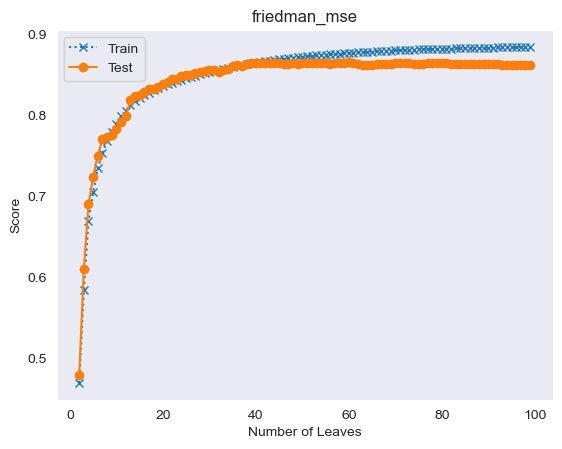

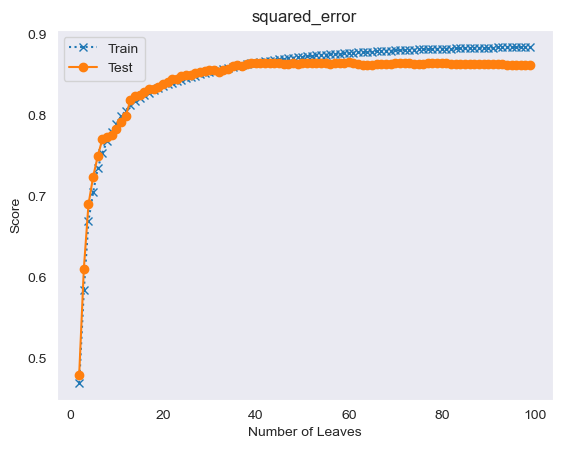

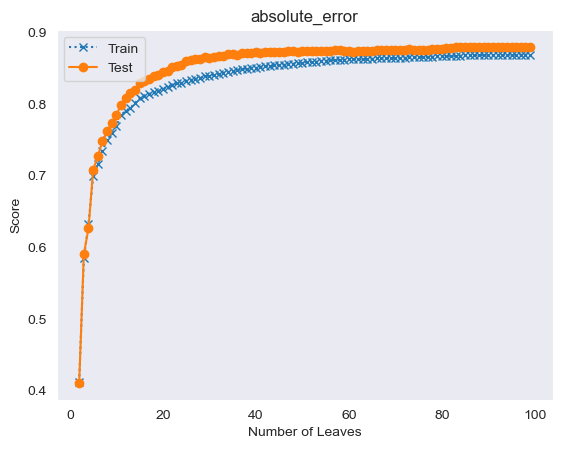

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X_train = pd.read_csv('x_train_preprocessed.csv')
X_test = pd.read_csv('x_test_preprocessed.csv')
y_train = pd.read_csv('y_train_preprocessed.csv')
y_test = pd.read_csv('y_test_preprocessed.csv')

X_train_nons = X_train.drop(columns=['Neighborhood_Score'])
X_test_nons = X_test.drop(columns=['Neighborhood_Score'])

criterions = ['friedman_mse', 'squared_error', 'absolute_error']

for crit in criterions:
    errors = []
    print(crit.upper())
    for max_leaves in range(2,100):
        dt_model = DecisionTreeRegressor(max_leaf_nodes=max_leaves, max_depth=10, min_samples_leaf=15, splitter='best', criterion=crit, max_features='auto')
        dt_model.fit(X_train_nons,y_train)
        train_r2 = dt_model.score(X_train_nons, y_train)
        test_r2 = dt_model.score(X_test_nons,y_test)
        print("n_iter_",max_leaves,"TRAIN: ", dt_model.score(X_train_nons, y_train), "TEST: ", dt_model.score(X_test_nons,y_test))
        errors += [ [max_leaves, train_r2, test_r2] ]

    errors = np.array(errors)
    fig, ax = plt.subplots()
    ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
    ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
    ax.set_ylabel("Score")
    ax.set_title(crit)
    ax.set_xlabel("Number of Leaves")
    ax.grid()
    ax.legend()

FRIEDMAN_MSE
n_iter_ 2 TRAIN:  0.4701377325912075 TEST:  0.48049259051794735
n_iter_ 3 TRAIN:  0.5844271194590351 TEST:  0.6108483383433645
n_iter_ 4 TRAIN:  0.6701481575638106 TEST:  0.6903375669318221
n_iter_ 5 TRAIN:  0.7050670056215778 TEST:  0.7241875595885392
n_iter_ 6 TRAIN:  0.7349382866111906 TEST:  0.7497604724487668
n_iter_ 7 TRAIN:  0.7532676119891808 TEST:  0.7707691045911327
n_iter_ 8 TRAIN:  0.768707084188694 TEST:  0.7726009789141185
n_iter_ 9 TRAIN:  0.7793307613850179 TEST:  0.7761910987141211
n_iter_ 10 TRAIN:  0.7889516830917673 TEST:  0.7825173296635551
n_iter_ 11 TRAIN:  0.7984645474801348 TEST:  0.7912785052223217
n_iter_ 12 TRAIN:  0.8055146216068162 TEST:  0.7988019391794081
n_iter_ 13 TRAIN:  0.8119451695269633 TEST:  0.8181112951048521
n_iter_ 14 TRAIN:  0.8172838275060825 TEST:  0.8240213207913929
n_iter_ 15 TRAIN:  0.8210000503134943 TEST:  0.8244546360725103
n_iter_ 16 TRAIN:  0.8244334832646557 TEST:  0.8288709093655389
n_iter_ 17 TRAIN:  0.82762220542019

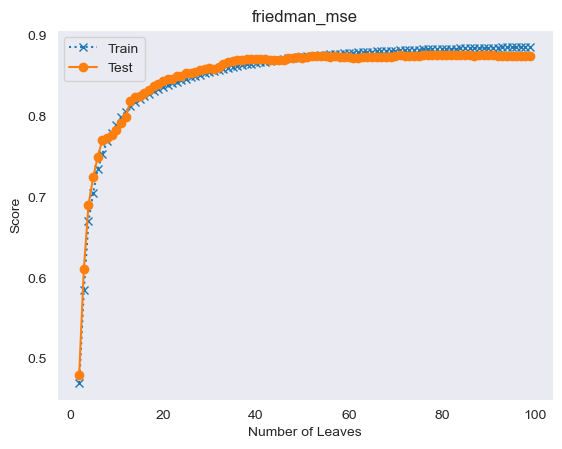

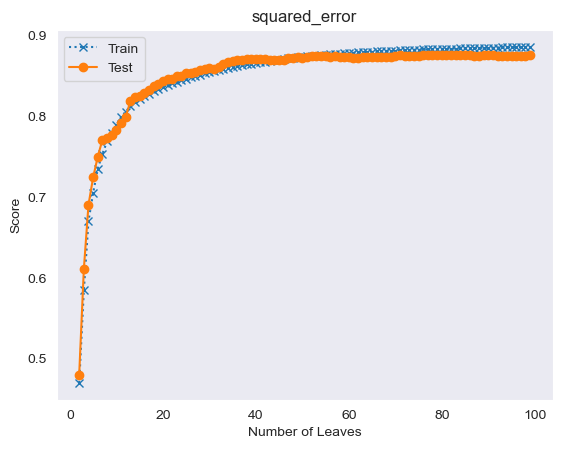

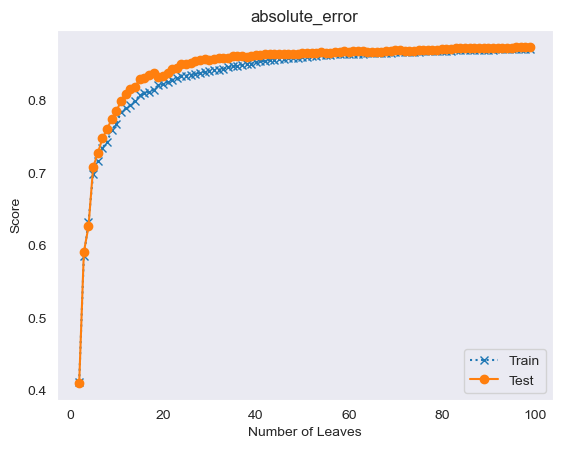

In [4]:
for crit in criterions:
    errors = []
    print(crit.upper())
    for max_leaves in range(2,100):
        dt_model = DecisionTreeRegressor(max_leaf_nodes=max_leaves, max_depth=10, min_samples_leaf=15, splitter='best', criterion=crit, max_features='auto')
        dt_model.fit(X_train,y_train)
        train_r2 = dt_model.score(X_train, y_train)
        test_r2 = dt_model.score(X_test,y_test)
        print("n_iter_",max_leaves,"TRAIN: ", dt_model.score(X_train, y_train), "TEST: ", dt_model.score(X_test,y_test))
        errors += [ [max_leaves, train_r2, test_r2] ]

    errors = np.array(errors)
    fig, ax = plt.subplots()
    ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
    ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
    ax.set_title(crit)
    ax.set_ylabel("Score")
    ax.set_xlabel("Number of Leaves")
    ax.grid()
    ax.legend()

# Choosing to mantain the custom feature
The graphs and numerical observations show how the "Neighborhood Score" feature provides information to the model. Based on this, it is decided to retain the feature.

# Choosing to mantain or not the components of custom features

FRIEDMAN_MSE
n_iter_ 2 TRAIN:  0.4701377325912075 TEST:  0.48049259051794735
n_iter_ 3 TRAIN:  0.5844271194590351 TEST:  0.6108483383433645
n_iter_ 4 TRAIN:  0.6701481575638106 TEST:  0.6903375669318221
n_iter_ 5 TRAIN:  0.7050670056215778 TEST:  0.7241875595885392
n_iter_ 6 TRAIN:  0.7349382866111906 TEST:  0.7497604724487668
n_iter_ 7 TRAIN:  0.7532676119891808 TEST:  0.7707691045911327
n_iter_ 8 TRAIN:  0.768707084188694 TEST:  0.7726009789141185
n_iter_ 9 TRAIN:  0.7793307613850179 TEST:  0.7761910987141211
n_iter_ 10 TRAIN:  0.7889516830917673 TEST:  0.7825173296635551
n_iter_ 11 TRAIN:  0.7967218835767551 TEST:  0.7857327179336083
n_iter_ 12 TRAIN:  0.8037719577034365 TEST:  0.7932561518906946
n_iter_ 13 TRAIN:  0.8102025056235835 TEST:  0.8125655078161388
n_iter_ 14 TRAIN:  0.8155411636027028 TEST:  0.8184755335026797
n_iter_ 15 TRAIN:  0.8192573864101147 TEST:  0.818908848783797
n_iter_ 16 TRAIN:  0.822690819361276 TEST:  0.8233251220768255
n_iter_ 17 TRAIN:  0.8258795415168109

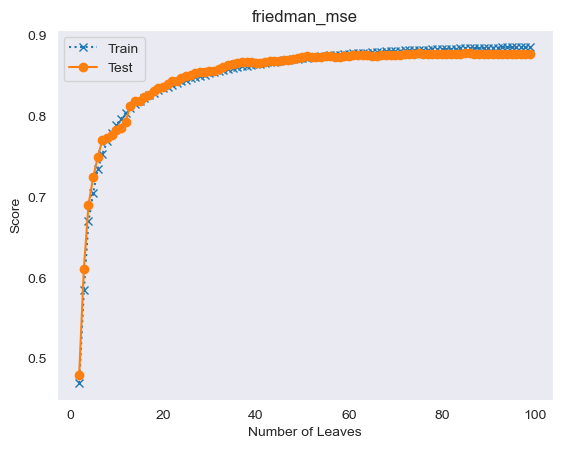

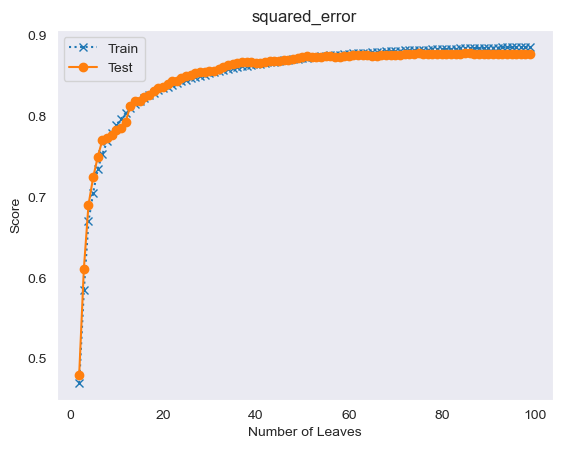

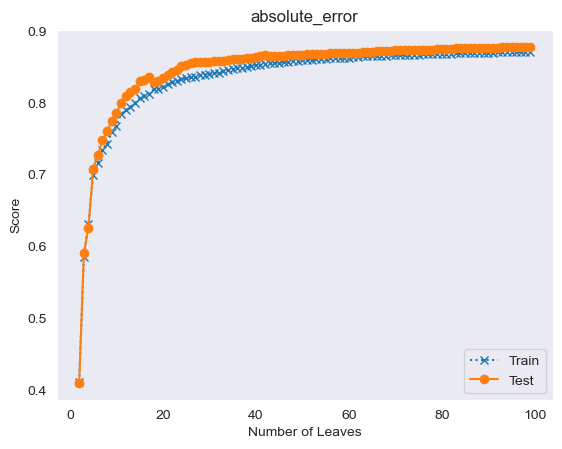

In [5]:
oh_neighbor = []
for col in X_train.columns:
    if 'Neighborhood_b' in col:
        oh_neighbor.append(col)

X_train_modified = X_train.drop(columns=oh_neighbor)
X_test_modified= X_test.drop(columns=oh_neighbor)

porch = ['Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', 'Three_season_porch', 'Screen_Porch']
surface = ['Total_Finished_Bsmt_SF', 'First_Flr_SF', 'Second_Flr_SF', 'Garage_Area']
baths = ['Full_Bath', 'Half_Bath', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath']

X_train_modified = X_train_modified.drop(columns=porch)
X_test_modified = X_test_modified.drop(columns=porch)

X_train_modified = X_train_modified.drop(columns=surface)
X_test_modified = X_test_modified.drop(columns=surface)

X_train_modified = X_train_modified.drop(columns=baths)
X_test_modified = X_test_modified.drop(columns=baths)

for crit in criterions:
    errors = []
    print(crit.upper())
    for max_leaves in range(2,100):
        dt_model = DecisionTreeRegressor(max_leaf_nodes=max_leaves, max_depth=10, min_samples_leaf=15, splitter='best', criterion=crit, max_features='auto')
        dt_model.fit(X_train_modified,y_train)
        train_r2 = dt_model.score(X_train_modified, y_train)
        test_r2 = dt_model.score(X_test_modified,y_test)
        print("n_iter_",max_leaves,"TRAIN: ", dt_model.score(X_train_modified, y_train), "TEST: ", dt_model.score(X_test_modified,y_test))
        errors += [ [max_leaves, train_r2, test_r2] ]

    errors = np.array(errors)
    fig, ax = plt.subplots()
    ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
    ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
    ax.set_title(crit)
    ax.set_ylabel("Score")
    ax.set_xlabel("Number of Leaves")
    ax.grid()
    ax.legend()


# Remarks on the removals of removed variables
The learning curve seems to improve slightly, but we do not have noticeable differences, however, this indicates to us that the removed features were not incisive on the model's explainabilities.
So we are not going to add them back in but remove them permanently.

# Hyperparameters Tuning
Using the GridSearchCV function provided by sklearn to perform a hyperparameter tuning by choosing a list of parameter combinations to try.
It's important to specify the number of cross-fold validation, this technique will go to perform different tests with different "cuts" of the dataset train, thus going to find parameters that do not work only in the case of "a specific observations" but at a general level.
This technique is used to obtain a stable model that does not stop working as soon as the testing dataset is changed.
![](images/grid_search_cross_validation.png)

In [6]:
parameters={"splitter":["best","random"],
            "max_depth" : [None,1,3,5,7,9,11,12],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5],
            "max_features":['auto','log2','sqrt',None],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

reg_decision_model=DecisionTreeRegressor()
reg_decision_model.fit(X_train_modified,y_train)

tuning_model=GridSearchCV(
reg_decision_model,param_grid=parameters,
    scoring='r2'
    ,cv=5,
    verbose=2,n_jobs= -1)

tuning_model.fit(X_train_modified,y_train)
print("Param found by CV GRID",tuning_model.best_params_)

Fitting 5 folds for each of 38400 candidates, totalling 192000 fits
Param found by CV GRID {'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 70, 'min_samples_leaf': 3, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}


Note the overfitting between test and train result

In [7]:
print(tuning_model.score(X_train_modified,y_train))
print(tuning_model.score(X_test_modified,y_test))

0.9001542647532912
0.7923628859256897


# Improving Hyperparameters tuning with prepruning
Thanks to the previous observations, we are able to obtain a more limited number of parameters to test while also trying to reduce overfitting as best we can by taking advantage of max_depth and min_samples_leaf parameters.
So using a "prepruning" approach.

In [34]:
parameters={"criterion":["absolute_error"],
            "splitter":["best","random"],
            "max_depth" : range(5,12),
            "min_samples_leaf":range(6,12),
            "max_features":['auto'],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
            "random_state": [3]
            }

reg_decision_model=DecisionTreeRegressor()
reg_decision_model.fit(X_train_modified,y_train)

tuning_model=GridSearchCV(
    reg_decision_model,param_grid=parameters,
    scoring='r2'
    ,cv=5,
    verbose=2,n_jobs= -1)

tuning_model.fit(X_train_modified,y_train)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['absolute_error'],
                         'max_depth': range(5, 12), 'max_features': ['auto'],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': range(6, 12), 'random_state': [3],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=2)

In [35]:
print("Print best parameters", tuning_model.best_params_)
print("Print best score based on all the cv fold made by cv grid",tuning_model.best_score_)
print("Score on train data",tuning_model.score(X_train_modified,y_train))
print("Score on test data",tuning_model.score(X_test_modified,y_test))


Print best parameters {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 10, 'random_state': 3, 'splitter': 'best'}
Print best score based on all the cv fold made by cv grid 0.8086221056359848
Score on train data 0.884235977327722
Score on test data 0.8799977080995058


Note the overfitting has been reduced also the score on test is improved

# Hyperparameters tuning with postpruning

In [41]:
parameters={"criterion":["absolute_error"],
            "splitter":["random"],
            "max_depth" : range(5,13),
            "max_features":['auto'],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
            "ccp_alpha": [0.05,0.010,0.025,0.030,0.1,0.2,0.3,0.4],
            "random_state": [6]
            }

reg_decision_model=DecisionTreeRegressor()
reg_decision_model.fit(X_train_modified,y_train)

tuning_model=GridSearchCV(
    reg_decision_model,param_grid=parameters,
    scoring='r2'
    ,cv=5,
    verbose=2,n_jobs= -1)

tuning_model.fit(X_train_modified,y_train)



Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.05, 0.01, 0.025, 0.03, 0.1, 0.2, 0.3,
                                       0.4],
                         'criterion': ['absolute_error'],
                         'max_depth': range(5, 13), 'max_features': ['auto'],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'random_state': [6], 'splitter': ['random']},
             scoring='r2', verbose=2)

In [42]:
print("Print best parameters", tuning_model.best_params_)
print("Print best score based on all the cv fold made by cv grid",tuning_model.best_score_)
print("Score on train data",tuning_model.score(X_train_modified,y_train))
print("Score on test data",tuning_model.score(X_test_modified,y_test))

Print best parameters {'ccp_alpha': 0.05, 'criterion': 'absolute_error', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': None, 'random_state': 6, 'splitter': 'random'}
Print best score based on all the cv fold made by cv grid 0.7777499467197603
Score on train data 0.9096598110803868
Score on test data 0.7745053091466362


Postpruning seems to be less effective than prepruning but we have not tried out all ccp_alphas alone and max_leaf_nodes is set at None so further analysis is required